In [1]:
from pathlib import Path
import pandas as pd
import pymc3 as pm
import numpy as np

from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
datapath = Path("/Users/rwhitley/Repositories/Projects/SAM_PYMC/data/")
datasets = {f.name[:-4]: pd.read_csv(f, skiprows=1, index_col=['Year'], sep=" ", parse_dates=True, \
                                        date_parser=lambda x: pd.datetime.strptime(x, '%Y')) \
                for f in datapath.glob("*.csv")}

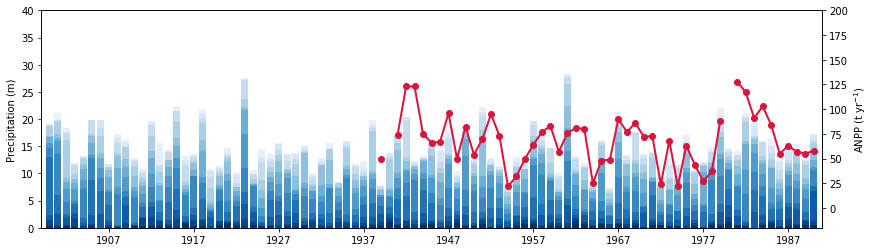

In [13]:
plt.figure(figsize=(14,4))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()

n_month = datasets['dataset3'].shape[1]
color_list = [plt.get_cmap('Blues_r')(1. * i/n_month) for i in range(n_month)]
ax1.set_prop_cycle(cycler('color', color_list))
bottom = 0
                   
for m in range(n_month):
    ax1.bar(datasets['dataset3'].index, datasets['dataset3'].iloc[:,m], width=300, bottom=bottom)
    bottom += datasets['dataset3'].iloc[:,(m)]
ax1.set_ylim([0, 40])
ax1.set_xlim(["1899-01-01", "1991-01-01"])
ax1.set_ylabel("Precipitation (m)")

ax2.plot(datasets['dataset2'].index, datasets['dataset2']["NPP"], 'o-', c='crimson', lw=2)
ax2.set_ylim([-20, 200])
ax2.set_ylabel("ANPP (t yr$^{-1}$)")

plt.show()